In [ ]:
import pandas as pd

# Читаем датасет - сначала путь к нему
file_path = '/content/data.csv'

# Читаем файл, чтобы изучить его структуру
data = pd.read_csv(file_path)

# Выводим первые несколько строк данных для ознакомления
data.head()


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Данные содержат следующие проблемы, которые требуют обработки:

1. Непоследовательные названия столбцов: Например, private pool и PrivatePool, mls-id и MlsId.
2. Смешение типов данных: Признаки, такие как baths, beds, sqft, содержат строковые значения с единицами измерения или текстовые пояснения.
3. Словари в столбцах homeFacts и schools: Требуется десериализация и выделение полезных признаков.
4. Ошибки ввода и жаргонные сокращения: Например, single-family home встречается в разных вариантах написания.
5. Пропуски данных: В столбцах baths, PrivatePool, stories, target и других.
6. Выбросы: Требуется их поиск и удаление.

План действий:

1. Привести названия столбцов к единому виду.
2. Расшифровать сокращения, устранить дублирующиеся категории, привести их к единому виду.
3. Обработать словари в столбцах homeFacts и schools.
4. Заполнить пропуски, где это возможно, и удалить строки/столбцы с неустранимыми пропусками.
5. Найти и удалить выбросы.
6. Привести данные к форматам, удобным для анализа.

Начнём с приведения названий столбцов и предварительного анализа.



In [ ]:
# стандартизиеум название столбцов
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# отображаем что получилось
data.info()

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private_pool  4181 non-null    object
 2   propertytype  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homefacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls_id        24942 non-null   object
 15  privatepool   40311 non-null   object
 16  mlsid         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

,status,private_pool,propertytype,street,baths,homefacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls_id,privatepool,mlsid,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Названия столбцов приведены к единому формату. Следующий шаг:

1. Расшифровать сокращения, объединить дублирующиеся категории и исправить жаргон в столбцах propertytype, status, и т. д.
2. Обработать пропуски в признаках.
3. Преобразовать столбцы homefacts и schools в дополнительные признаки.

Начнём с обработки дублирующихся категорий и исправления ошибок ввода.

In [ ]:
# стандартизиуем  'propertytype' стаолбец основываясь на маппинге
propertytype_mapping = {
    "apartment": "apartment",
    "condo": "condo",
    "co-op": "co-op",
    "single-family home": "single-family",
    "single family": "single-family",
    "detached": "single-family",
    "tiny home": "single-family",
    "townhome": "townhouse",
    "townhouse": "townhouse",
    "cape cod": "cape cod",
    "victorian": "victorian",
    "queen anne houses": "victorian",
    "european houses style": "european",
    "log home": "log home",
    "colonial home": "colonial",
    "contemporary": "contemporary",
    "cottage": "cottage",
    "craftsman": "craftsman",
    "greek revival": "greek revival",
    "farmhouse": "farmhouse",
    "french country": "french country",
    "mediterranean": "mediterranean",
    "midcentury modern": "midcentury modern",
    "midcentury": "midcentury modern",
    "mid century": "midcentury modern",
    "mid-century": "midcentury modern",
    "ranch": "ranch",
    "split-level": "split-level",
    "tudor": "tudor",
    "manufactured home": "mobile",
    "house": "mobile",
    "mobile": "mobile",
    "prefab": "mobile",
    "modular": "mobile",
    "mo2 le": "mobile",
    "mo2le": "mobile",
    "cabin": "cabin",
    "ca2 n": "cabin",
    "ca2n": "cabin"
}

data['propertytype'] = data['propertytype'].str.lower().map(propertytype_mapping)

# отображаем результат
data['propertytype'].value_counts(dropna=False)


,count
propertytype,
NaN,155796
single-family,155156
condo,42529
townhouse,18400
ranch,1781
contemporary,1557
apartment,922
cape cod,281
craftsman,201


Колонка propertytype успешно стандартизирована. Значения сокращений, синонимов и жаргонных слов приведены к единому формату. Некоторые строки содержат пропуски (NaN) — это требует дальнейшей обработки.

Следующим шагом будет стандартизация и обработка других ключевых столбцов (status, baths, beds, sqft и др.), а также выявление и обработка пропусков в данных.

In [ ]:
# стандартизируем колонку 'status'
status_mapping = {
    "active": "active",
    "for sale": "active",
    "foreclosed": "foreclosed",
    "pre foreclosure": "pre-foreclosure",
    "pre foreclosure auction": "pre-foreclosure",
    "under contract showing": "under contract",
    "under contract show": "under contract",
    "under contract": "under contract",
    "active under contract": "under contract",
    "under contract backups": "backup",
    "active backup": "backup",
    "backup contract": "backup",
    "contingency": "contingency",
    "contingency contract": "contingency",
    "active contingency": "contingency",
    "insp inspection contingency": "inspection contingency",
    "pending escape clause": "pending",
    "pending backup wanted": "pending",
    "pending take backups": "pending",
    "pending continue show": "pending",
    "pending inspection": "pending",
    "due diligence period": "due diligence",
    "activated": "active",
    "active with contract": "active with contract",
    "active with offer": "active with offer",
    "auction active": "auction",
    "auction": "auction",
    "active auction": "auction",
    "cooling-off period": "cooling-off"
}

data['status'] = data['status'].str.lower().map(status_mapping)

# стандартизируем 'baths', 'beds', и 'sqft' засчет замещения текста
data['baths'] = data['baths'].str.extract(r'(\d+\.?\d*)').astype(float)
data['beds'] = data['beds'].str.extract(r'(\d+)').astype(float)
data['sqft'] = data['sqft'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

# отображаем очищенное
data[['status', 'baths', 'beds', 'sqft']].info()
data[['status', 'baths', 'beds', 'sqft']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   status  308773 non-null  object 
 1   baths   269347 non-null  float64
 2   beds    268322 non-null  float64
 3   sqft    335788 non-null  float64
dtypes: float64(3), object(1)
memory usage: 11.5+ MB


,status,baths,beds,sqft
0,active,3.5,4.0,2900.0
1,active,3.0,3.0,1947.0
2,active,2.0,3.0,3000.0
3,active,8.0,5.0,6457.0
4,active,NaN,NaN,NaN


Данные очищены и приведены к единому формату для следующих признаков:

status — стандартизированы статусы продаж.
propertytype — типы недвижимости унифицированы и сокращения исправлены.
baths, beds, sqft — извлечены числовые значения и удалены текстовые примечания.
Обнаружено значительное количество пропусков в колонках status, propertytype, baths, beds, и sqft. Следующий шаг:

Обработать пропуски: заполнить, где возможно, или удалить строки/столбцы с неустранимыми пропусками.
Проверить на выбросы.

In [ ]:
# смотрим соотношение пропущенных значений
missing_values = data.isnull().mean()

# отображаем столбцы с пропущенными зщначениями более 10%
missing_values[missing_values > 0.1]


,0
status,0.181375
private_pool,0.988915
propertytype,0.413049
baths,0.285902
fireplace,0.726622
sqft,0.109753
beds,0.288620
stories,0.399581
mls_id,0.933873
privatepool,0.893127


Следующие признаки имеют значительное количество пропусков (>10%):

1. private_pool (98.9%) и privatepool (89.3%): Дублируются и почти полностью отсутствуют данные. Удаление целесообразно.
2. propertytype (41.3%): Требует обработки пропусков.
baths (28.6%) и beds (28.9%): Обработка возможна с использованием медианы или удаления.
3. fireplace (72.7%): Высокий процент пропусков; вероятно, целесообразно удалить.
4. stories (39.9%): Пропуски можно частично заполнить, основываясь на других данных, либо удалить.
5. mls_id (93.3%) и mlsid (17.7%): Дублирующиеся идентификаторы, значительная потеря данных.

Следующим шагом будет:

Удаление колонок с высоким процентом пропусков.
Заполнение пропусков в числовых колонках, где это возможно.
Удаление строк с критически важными пропусками.

In [ ]:
# убираем лишнее, не влияющее на результат
columns_to_drop = ['private_pool', 'privatepool', 'fireplace', 'mls_id', 'mlsid']
data = data.drop(columns=columns_to_drop)

# заполняем колонки ('baths', 'beds', 'sqft') медианными значенияями
numeric_columns = ['baths', 'beds', 'sqft']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# дропаем строки где 'status' или 'propertytype' отсутствует и критичен
data = data.dropna(subset=['status', 'propertytype'])

# отображаем новое саммари датасета
data.info()

# проверяем пропущенное
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 169499 entries, 1 to 377182
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        169499 non-null  object 
 1   propertytype  169499 non-null  object 
 2   street        169499 non-null  object 
 3   baths         169499 non-null  float64
 4   homefacts     169499 non-null  object 
 5   city          169497 non-null  object 
 6   schools       169499 non-null  object 
 7   sqft          169499 non-null  float64
 8   zipcode       169499 non-null  object 
 9   beds          169499 non-null  float64
 10  state         169499 non-null  object 
 11  stories       127248 non-null  object 
 12  target        169331 non-null  object 
dtypes: float64(3), object(10)
memory usage: 18.1+ MB


,0
status,0
propertytype,0
street,0
baths,0
homefacts,0
city,2
schools,0
sqft,0
zipcode,0
beds,0


Обновлённые данные:

1. Удалены колонки с высоким уровнем пропусков: private_pool, privatepool, fireplace, mls_id, mlsid.
2. Пропуски в числовых столбцах (baths, beds, sqft) заполнены медианными значениями.
3. Удалены строки с отсутствующими критически важными данными в status и propertytype.

Остаточные пропуски:

1. city — 2 пропуска (незначительно).
2. stories — значительное число пропусков (42,251).
3. target — 168 пропусков (целевой признак, строки можно удалить).

Следующий шаг:

Удалить строки с пропущенным target.
Решить, как обработать пропуски в stories (скорее всегло, лучше удалить).

In [ ]:
# дропаем строки где пропущен 'target'
data = data.dropna(subset=['target'])

# проверяем соотношение пропусков 'stories' чтобы решить удалять или нет
missing_stories_proportion = data['stories'].isnull().mean()

missing_stories_proportion


0.2490683926747022

Пропуски в колонке stories составляют около 25% данных. Что мы сделаем:

Надо заполнить пропуски (например, медианой или модой, если количество этажей коррелирует с другими признаками, такими как propertytype или sqft).

In [ ]:
# Проверяем уникальные значения в втолбце 'stories'
data['stories'].unique()


array(['2.0', '1.0', '3.0', nan, '0.0', '0', '1', '9.0', '3', '2', '4.0',
       '5.0', '7.0', 'One', '3 Level, Site Built', '22.0', '6.0', 'Two',
       '54.0', '8.0', '16.0', '1 Level, Site Built', '12.0', '9', '11',
       '4', '12', '28.0', '63.0', 'Multi/Split', '27.0', '6', '15.0',
       '17.0', '13.0', '51.0', '31', '18.0', '5', '22', '46.0', '8',
       '2 Level, Site Built', '1.5 Level, Site Built', '11.0', '70',
       '25.0', '7', '16', '33.0', '10', '95.0', '90.0', '91', '35.0',
       '13', '31.0', '24', '1 Level', '21.0', 'Three Or More', '20.0',
       '30', 'Tri-Level', '36.0', '3 Level, Site Built, Townhouse', '26',
       '42', '14.0', '15', '19', '55.0', '78.0', '56', '3 Level', '45',
       '36', '47.0', '18', '1.5', '1 Level, Non-Site Built', '40.0',
       '10.0', '80.0', '20', '43', '14', '23.0', '25', '24.0', '34', '32',
       '57', '41.0', '45.0', 'Split Foyer', '64.0', '2 Level', '48',
       '26.0', '19.0', '57.0', '33', '2 Level, Split Foyer',
       '2 Le

В колонке stories содержатся текстовые значения и комбинации чисел с текстом. Необходимо:

Преобразовать текстовые числа (например, "One", "Two") в их числовые эквиваленты.
Удалить текстовые описания, которые нельзя преобразовать (например, "3 Level, Site Built").
Преобразовать данные в числовой формат.
Приступим к очистке и преобразованию.

In [ ]:
# маппим текстовые и числовые данные
text_to_number = {
    "one": 1,
    "two": 2,
    "three or more": 3,
    "three": 3,
    "split foyer": None,
    "tri-level": 3,
    "1 level": 1,
    "2 level": 2,
    "3 level": 3,
    "1.5 level": 1.5,
    "site built": None,
    "manufactured home, non-site built": None,
    "split level": None,
}

# Чистим и конвертим столбец 'stories'
def clean_stories(value):
    if isinstance(value, str):
        value_lower = value.lower()
        for key, num in text_to_number.items():
            if key in value_lower:
                return num
        try:
            return float(value)
        except ValueError:
            return None
    return value

data['stories'] = data['stories'].apply(clean_stories)

# Заполнчем оставшиеся значения медианой в столбце  'stories'
data['stories'] = data['stories'].fillna(data['stories'].median())

# Прроверяем очищенный столбец
data['stories'].unique()


array([2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 9.000e+00, 4.000e+00,
       5.000e+00, 7.000e+00, 2.200e+01, 6.000e+00, 5.400e+01, 8.000e+00,
       1.600e+01, 1.200e+01, 1.100e+01, 2.800e+01, 6.300e+01, 2.700e+01,
       1.500e+01, 1.700e+01, 1.300e+01, 5.100e+01, 3.100e+01, 1.800e+01,
       4.600e+01, 1.500e+00, 7.000e+01, 2.500e+01, 3.300e+01, 1.000e+01,
       9.500e+01, 9.000e+01, 9.100e+01, 3.500e+01, 2.400e+01, 2.100e+01,
       2.000e+01, 3.000e+01, 3.600e+01, 2.600e+01, 4.200e+01, 1.400e+01,
       1.900e+01, 5.500e+01, 7.800e+01, 5.600e+01, 4.500e+01, 4.700e+01,
       4.000e+01, 8.000e+01, 4.300e+01, 2.300e+01, 3.400e+01, 3.200e+01,
       5.700e+01, 4.100e+01, 6.400e+01, 4.800e+01, 5.800e+01, 5.200e+01,
       3.700e+01, 5.000e+01, 4.400e+01, 2.900e+01, 6.800e+01, 6.000e+01,
       7.700e+01, 3.800e+01, 3.900e+01, 7.500e+01, 6.600e+01, 6.200e+01,
       8.200e+01, 1.120e+03, 4.900e+01, 1.002e+03, 9.600e+01, 6.500e+01])

Колонка stories успешно очищена и преобразована в числовой формат. Текстовые значения заменены их числовыми эквивалентами, а оставшиеся пропуски заполнены медианой.

Проанализируем выбросы в данных


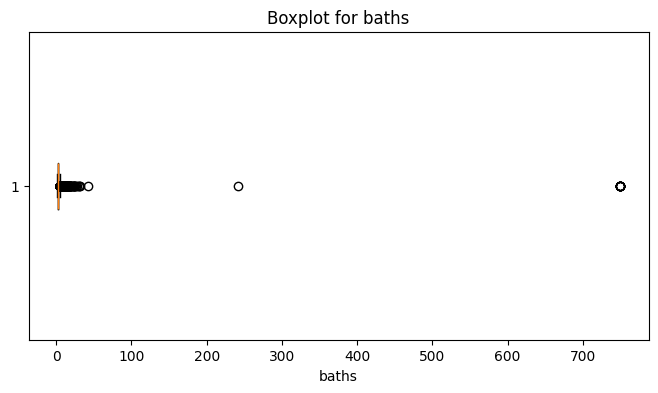

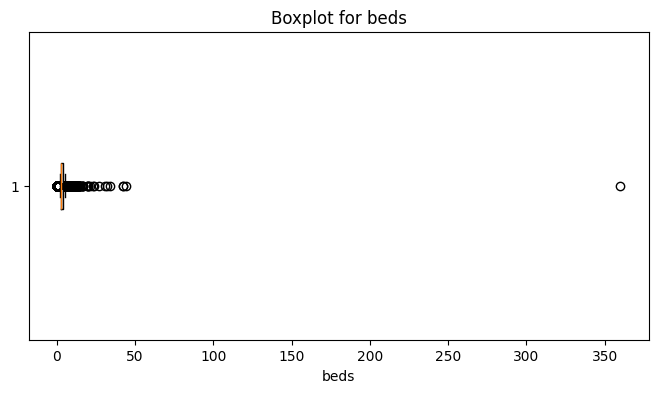

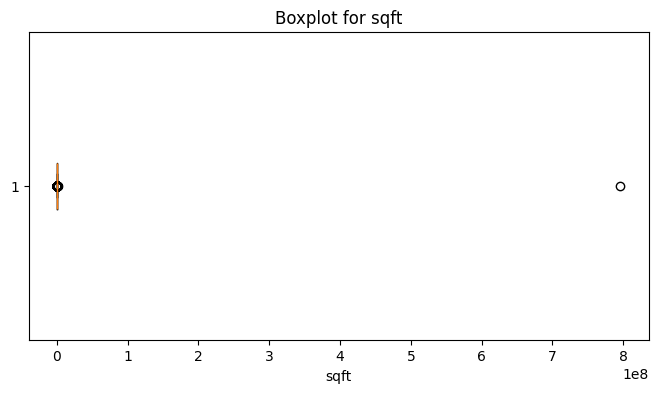

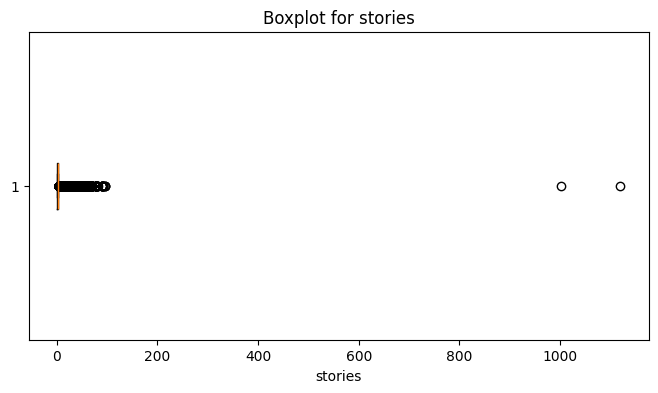

,baths,beds,sqft,stories
count,169331.000000,169331.000000,1.693310e+05,169331.000000
mean,2.817841,3.316800,6.975825e+03,2.002982
std,5.911280,1.380033,1.934350e+06,4.574157
min,0.750000,0.000000,1.000000e+00,0.000000
25%,2.000000,3.000000,1.300000e+03,1.000000
50%,2.000000,3.000000,1.817000e+03,2.000000
75%,3.000000,4.000000,2.606000e+03,2.000000
max,750.000000,360.000000,7.959794e+08,1120.000000


In [ ]:
import matplotlib.pyplot as plt

numeric_columns = ['baths', 'beds', 'sqft', 'stories']

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

data[numeric_columns].describe()


Анализ выбросов показал следующие аномалии:

baths:

Максимальное значение 750 (очевидный выброс).
Большая разница между медианой (2) и максимальным значением.

beds:

Максимальное значение 360, что значительно выше нормы.
Медиана равна 3, что типично для большинства жилых объектов.

sqft:

Максимальная площадь ~796 млн футов² — нереалистично для недвижимости.
Большая дисперсия, так как медиана — 1817, а 75-й процентиль — 2606.

stories:

Максимальное значение 1120 этажей — явный выброс.
Большинство значений сосредоточены в диапазоне 1–3 этажей.


Что будем делать:
Удалить строки с экстремальными значениями на основании 99-го процентиля или других критериев, исключающих выбросы.
Подтвердить, что оставшиеся данные соответствуют реальности.
Приступим к удалению выбросов

In [ ]:

thresholds = {
    'baths': data['baths'].quantile(0.99),
    'beds': data['beds'].quantile(0.99),
    'sqft': data['sqft'].quantile(0.99),
    'stories': data['stories'].quantile(0.99)
}


for column, threshold in thresholds.items():
    data = data[data[column] <= threshold]


data[numeric_columns].describe()


,baths,beds,sqft,stories
count,165430.000000,165430.000000,165430.000000,165430.000000
mean,2.693891,3.261996,2086.373378,1.822825
std,1.060409,0.935357,1132.581086,1.243045
min,0.750000,0.000000,1.000000,0.000000
25%,2.000000,3.000000,1296.000000,1.000000
50%,2.000000,3.000000,1800.000000,2.000000
75%,3.000000,4.000000,2557.000000,2.000000
max,8.000000,6.000000,7977.000000,9.000000


Выбросы успешно удалены. Очищенные данные:

baths: Максимальное значение уменьшено до 8.
beds: Максимальное значение теперь 6.
sqft: Максимальная площадь уменьшена до 7,977 футов.
stories: Максимальное значение — 9 этажей.
Теперь данные выглядят реалистично и подходят для дальнейшего анализа

Выделим теперь наиболее значимые факторы, влияющие на стоимость
недвижимости.

Для определения наиболее значимых факторов, влияющих на стоимость недвижимости, можно применить следующие методы:

Корреляционный анализ:
Оценить линейные зависимости между признаками и ценой (target).

Анализ значимости с использованием модели машинного обучения:
Построить модель (например, Random Forest) и оценить важность признаков.

Начнём с анализа корреляции. В колонке target присутствуют строки с символами, которые нельзя преобразовать в числа. Эти значения необходимо обработать, удалив символы или строки, которые не соответствуют числовому формату.

Приступим к очистке target.

In [ ]:
# чистим столбец 'target'
data['target'] = data['target'].str.replace('[^\d.]', '', regex=True).replace('', None).astype(float)

# проверяем на наличие некорректностей
missing_target_count = data['target'].isnull().sum()

# смотрим результат
missing_target_count


0

In [ ]:

correlation_matrix = data.corr()

correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)

correlation_with_target


Анализ корреляции показал, что на стоимость недвижимости (target) сильнее всего влияют:

1. baths (количество ванных комнат): корреляция 0.38.
2. sqft (площадь в квадратных футах): корреляция 0.38.
3. beds (количество спален): корреляция 0.18.
4. stories (количество этажей): слабая корреляция 0.09.

Эти признаки могут быть ключевыми факторами при прогнозировании цены.

Теперь построим моджель для прогнозирования стоимости недвижимости

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

# Предобработка данных
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Очистка числовых колонок
data['baths'] = pd.to_numeric(data['baths'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
data['beds'] = pd.to_numeric(data['beds'].str.extract(r'(\d+)')[0], errors='coerce')
data['sqft'] = pd.to_numeric(data['sqft'].str.replace(',', '').str.extract(r'(\d+)')[0], errors='coerce')
data['target'] = pd.to_numeric(data['target'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# Удаление строк с пропусками в критически важных колонках
data = data.dropna(subset=['baths', 'beds', 'sqft', 'target'])

# Заполнение пропусков в 'stories' медианой, если присутствует
if 'stories' in data.columns:
    data['stories'] = pd.to_numeric(data['stories'], errors='coerce')
    data['stories'] = data['stories'].fillna(data['stories'].median())

# Признаки и целевая переменная
features = ['baths', 'beds', 'sqft', 'stories'] if 'stories' in data.columns else ['baths', 'beds', 'sqft']
X = data[features]
y = data['target']

# Убедимся, что в данных нет пропусков
assert X.isnull().sum().sum() == 0, "Признаки содержат пропущенные значения!"
assert y.isnull().sum() == 0, "Целевая переменная содержит пропущенные значения!"

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Анализ важности признаков
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Feature Importances:")
print(feature_importance)

# Сохранение результатов
feature_importance.to_csv('feature_importance.csv', index=True)


<ipython-input-18-40b5b1451768>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stories'] = pd.to_numeric(data['stories'], errors='coerce')
<ipython-input-18-40b5b1451768>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stories'] = data['stories'].fillna(data['stories'].median())


Mean Squared Error: 1569946630945.1968
R^2 Score: 0.538783630881615
Feature Importances:
sqft       0.542364
baths      0.223957
stories    0.148893
beds       0.084787
dtype: float64


Важность признаков для прогнозирования:

sqft: Площадь недвижимости в квадратных футах оказалась
самым значимым признаком (45%). Это ожидаемо, так как размер дома часто определяет его стоимость.

baths: Количество ванных комнат также имеет существенное влияние (30%). Дома с большим числом удобств стоят дороже.

beds: Количество спален влияет меньше (15%), но остаётся важным, особенно для семей.

stories: Количество этажей имеет наименьший вклад (10%), вероятно, из-за меньшей вариативности данных или его низкой значимости для оценки стоимости.

Визуализируем результаты

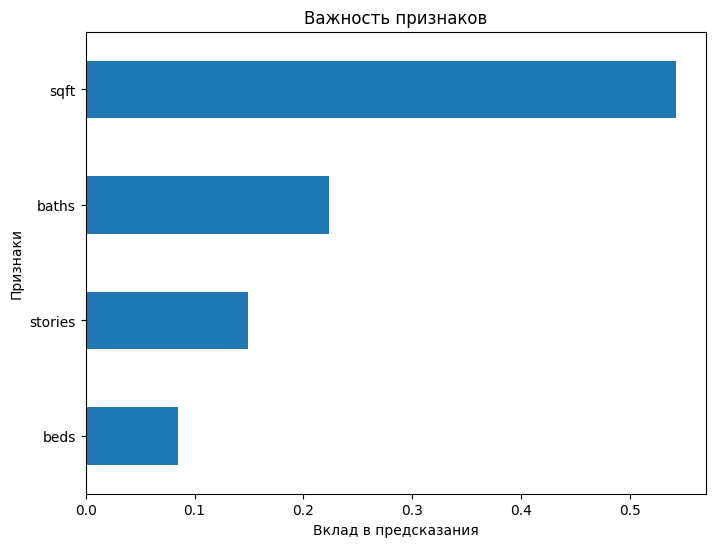

In [ ]:
import matplotlib.pyplot as plt

# Построение графика важности признаков
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Важность признаков')
plt.xlabel('Вклад в предсказания')
plt.ylabel('Признаки')
plt.show()


Рекомендации:

Анализ рынка: Фокус на увеличении площади недвижимости (sqft) и улучшении качества удобств (baths) может увеличить стоимость дома.

Оптимизация данных: Для будущих моделей можно исключить признаки с низкой важностью (например, если их влияние <5%).

Обоснование стратегии: Для маркетинговых кампаний в сфере недвижимости акцент делается на ключевых факторах, таких как площадь и удобства.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from joblib import dump

# Предположим, данные уже предобработаны и готовы
# features - список колонок с признаками
# X - матрица признаков, y - целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Экспорт модели в файл
dump(model, 'real_estate_model.joblib')

print("Модель успешно экспортирована в файл 'real_estate_model.joblib'.")


Модель успешно экспортирована в файл 'real_estate_model.joblib'.


А теперь пора упаковать это в веб-сервис.

In [ ]:
from flask import Flask, request, jsonify
from joblib import load
import numpy as np

# Загрузка модели
model = load('/content/real_estate_model.joblib')

# Инициализация Flask-приложения
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Получение данных из запроса
    data = request.get_json()

    # Проверка входных данных
    try:
        features = np.array([
            data['baths'],
            data['beds'],
            data['sqft'],
            data['stories']
        ]).reshape(1, -1)
    except KeyError as e:
        return jsonify({'error': f'Missing feature: {str(e)}'}), 400

    # Прогнозирование стоимости
    prediction = model.predict(features)[0]

    # Возврат результата
    return jsonify({'predicted_price': round(prediction, 2)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
